# strong_scaling.ipynb
This notebook reads in timing information from Parallel SnowModel output files executed using different domains

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Functions

In [13]:
def get_parameter_float(stringtofind,parpath):
    """
        Gets float values from Parallel SnowModel output file.
        Parameters
        ----------
        stringtofind : string object that is searched in output file.
        stringtofind : string object of relative file path for output file.

        Returns
        -------
        var : float object of variable in output file.
    """
    with open(parpath) as f:
        for line in f:
            li = line.strip()
            if not li.startswith("!"):
                if stringtofind in li:
                    blah = li.replace(" ","")
                    var = float(blah.split(":",1)[1])
                    f.close()
                    return var

In [14]:
def get_parameter_int(stringtofind,parpath):
    """
        Gets integer values from Parallel SnowModel output file.
        Parameters
        ----------
        stringtofind : string object that is searched in output file.
        stringtofind : string object of relative file path for output file.

        Returns
        -------
        var : integer object of variable in output file.
    """
    with open(parpath) as f:
        for line in f:
            li = line.strip()
            if not li.startswith("!"):
                if stringtofind in li:
                    blah = li.replace(" ","")
                    var = int(blah.split("=",1)[1])
                    f.close()
                    return var

In [15]:
def speedup(df):
    """
        Calculate rel_speedup, approx_speedup, rel_efficiency, and approx_efficiency.
        Parameters
        ----------
        df : pandas dataframe containing execution time as function of the number of processes.

        Returns
        -------
        df : original pandas dataframe with added columns of rel_speedup, approx_speedup, rel_efficiency, and approx_efficiency.
    """

    min_proc = df.num_proc.min()
    serial_t = df[df['num_proc'] == min_proc]['total'].values    
    ## calculate speedup ##
    df['rel_speedup'] = serial_t / df['total']
    df['approx_speedup'] = (serial_t / df['total']) * min_proc
    ## calculate efficiency ##
    df['rel_efficiency'] = (df['rel_speedup'] / df['num_proc']) * 100
    df['approx_efficiency'] = (df['approx_speedup'] / df['num_proc']) * 100
    df.sort_values(by = 'num_proc',inplace = True)
    
    return df

## Loop through output and read timing values

In [18]:
"""
    INPUTS -----------------------------------------------------------------------------------------------------------------------------------
"""
domain_lst_2 = []
np_lst = []
readparam_lst = []
preproc_lst = []
micromet_lst = []
enbal_lst = []
snowpack_lst = []
snowtran_lst = []
output_lst = []
master_lst = []
master_noninit_lst = []

## list of number of processes
proc_lst = [1,2,4,8,16,27,36,52,54,72,84,108,120,144,152,240,288,304,480,576,592,648,720,864,888,1152,1296,1728,1800,1944,2304,3456]
## submodule names in output files
stringtofind = ['ReadParam Time','PreProc Time','Distribute Time','MicroMet Time','Enbal Time','SnowPack Time','SnowTran Time','SnowTran Comm Time','Gather Time','Master NonInit Time','Master Total Time']
## base directory
base_dir = '../output_files/'
## domain list
domain_lst = ['tuolumne','co_headwaters','idaho','pnw','west_us','conus']

"""
    LOOP -----------------------------------------------------------------------------------------------------------------------------------
"""
for domain in domain_lst:
    ## loop through domains
    domain_dir = f'{base_dir}{domain}/'
    for proc in proc_lst:
        ## loop through number of processes
        proc_dir = f'{domain_dir}np_{proc}/'
        # print(proc_dir)
        
        isExists = os.path.exists(proc_dir)
        if isExists:
            
            for file in os.listdir(proc_dir):
                if '.out' in file:
                    try:
                        readparam_t_s = get_parameter_float('ReadParam Time',proc_dir+file) ## readparam time in seconds
                        preproc_t_s = get_parameter_float('PreProc Time',proc_dir+file) ## preproc time in seconds
                        micromet_t_s = get_parameter_float('MicroMet Time',proc_dir+file) ## miromet time in seconds
                        enbal_t_s = get_parameter_float('EnBal Time',proc_dir+file) ## enbal time in seconds
                        snowpack_t_s = get_parameter_float('SnowPack Time',proc_dir+file) ## snowpack time in seconds
                        snowtran_t_s = get_parameter_float('SnowTran Time',proc_dir+file) ## snowtran time in seconds
                        output_t_s = get_parameter_float('Output Time',proc_dir+file) ## output time in seconds
                        master_t_s = get_parameter_float('Master Total Time',proc_dir+file) ## master time in seconds
                        master_nonit_s = get_parameter_float('Master NonInit Time',proc_dir+file) ## master time in seconds
                    except:
                        readparam_t_s = -9999.0
                        preproc_t_s = -9999.0
                        micromet_t_s = -9999.0
                        enbal_t_s = -9999.0
                        snowpack_t_s = -9999.0
                        snowtran_t_s = -9999.0
                        output_t_s = -9999.0
                        master_t_s = -9999.0
                        master_nonit_s = -9999.0
                        proc = -9999.0
        else:
            readparam_t_s = -9999.0
            preproc_t_s = -9999.0
            micromet_t_s = -9999.0
            enbal_t_s = -9999.0
            snowpack_t_s = -9999.0
            snowtran_t_s = -9999.0
            output_t_s = -9999.0
            master_t_s = -9999.0
            master_nonit_s = -9999.0
            proc = -9999.0
                        
        # except:

        domain_lst_2.append(domain)
        np_lst.append(proc)
        readparam_lst.append(readparam_t_s)
        preproc_lst.append(preproc_t_s)
        micromet_lst.append(micromet_t_s)
        enbal_lst.append(enbal_t_s)
        snowpack_lst.append(snowpack_t_s)
        snowtran_lst.append(snowtran_t_s)
        output_lst.append(output_t_s)
        master_lst.append(master_t_s)
        master_noninit_lst.append(master_nonit_s)

## create dataframe 

In [19]:
df_master = pd.DataFrame({'domain':domain_lst_2,
                  'num_proc':np_lst,
                  'readparam':readparam_lst,
                   'preproc':preproc_lst,
                   'micromet':micromet_lst,
                   'enbal':enbal_lst,
                   'snowpack':snowpack_lst,
                   'snowtran':snowtran_lst,
                   'output':output_lst,
                   'total':master_lst,
                  }
                 )
df_master



,domain,num_proc,readparam,preproc,micromet,enbal,snowpack,snowtran,output,total
0,tuolumne,1.0,0.002208,0.178943,601.028931,58.707333,87.195343,26.077970,11.423367,784.927002
1,tuolumne,2.0,0.002265,0.073755,310.084045,29.416489,44.208099,13.481577,5.630421,403.197998
2,tuolumne,4.0,0.002282,0.033849,163.971542,14.892907,22.135050,6.507595,2.660630,210.327164
3,tuolumne,8.0,0.002313,0.090596,90.824364,7.575693,11.630379,3.727767,1.458382,115.387428
4,tuolumne,16.0,0.002733,0.095827,53.583000,3.762703,5.897007,2.460089,0.738379,66.705627
...,...,...,...,...,...,...,...,...,...,...
187,conus,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
188,conus,1800.0,0.003745,241.680847,16417.222700,655.133728,930.881470,3520.463380,321.006775,22236.779300
189,conus,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
190,conus,2304.0,0.003435,188.563293,14791.105500,530.566040,736.365417,3193.171880,297.457031,19809.671900


## pull out nx and ny from domains

In [20]:
tu_nx = get_parameter_int('nx','../output_files/tuolumne/np_1/sm_parallel_tuol_1.out') ## readparam time in seconds
tu_ny = get_parameter_int('ny','../output_files/tuolumne/np_1/sm_parallel_tuol_1.out') ## readparam time in seconds

# ## colorado headwaters memory ##
co_nx = get_parameter_int('nx','../output_files/co_headwaters/np_8/sm_parallel_co_8.out')
co_ny = get_parameter_int('ny','../output_files/co_headwaters/np_8/sm_parallel_co_8.out')

## idaho memory ##
id_nx = get_parameter_int('nx','../output_files/idaho/np_576/sm_parallel_idaho_576.out')
id_ny = get_parameter_int('ny','../output_files/idaho/np_576/sm_parallel_idaho_576.out')

# ## colorado headwaters memory ##
pnw_nx = get_parameter_int('nx','../output_files/pnw/np_120/sm_parallel_pnw_120.out')
pnw_ny = get_parameter_int('ny','../output_files/pnw/np_120/sm_parallel_pnw_120.out')

# # ## colorado headwaters memory ##
west_nx = get_parameter_int('nx','../output_files/west_us/np_2304/sm_parallel_west_2304.out')
west_ny = get_parameter_int('ny','../output_files/west_us/np_2304/sm_parallel_west_2304.out')

# ## colorado headwaters memory ##
conus_nx = get_parameter_int('nx','../output_files/conus/np_3456/sm_parallel_conus_3456.out')
conus_ny = get_parameter_int('ny','../output_files/conus/np_3456/sm_parallel_conus_3456.out')

## clean dataframe and calculate speedup and efficiency values

In [21]:
## replace -9999.0 with nan ##
df_master.replace(-9999.0,np.nan,inplace = True)

## separate dataframes for each git version ##
df_tu = df_master[df_master['domain'] == 'tuolumne']
df_co = df_master[df_master['domain'] == 'co_headwaters']
df_id = df_master[df_master['domain'] == 'idaho']
df_pnw = df_master[df_master['domain'] == 'pnw']
df_west = df_master[df_master['domain'] == 'west_us']
df_conus = df_master[df_master['domain'] == 'conus']
## calculate speedup from total and noninit##
df_tu = speedup(df_tu)
df_co = speedup(df_co)
df_id = speedup(df_id)
df_pnw = speedup(df_pnw)
df_west = speedup(df_west)
df_conus = speedup(df_conus)

/glade/derecho/scratch/rossamower/tmp/ipykernel_7302/108881350.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rel_speedup'] = serial_t / df['total']
/glade/derecho/scratch/rossamower/tmp/ipykernel_7302/108881350.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['approx_speedup'] = (serial_t / df['total']) * min_proc
/glade/derecho/scratch/rossamower/tmp/ipykernel_7302/108881350.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

## Plotting

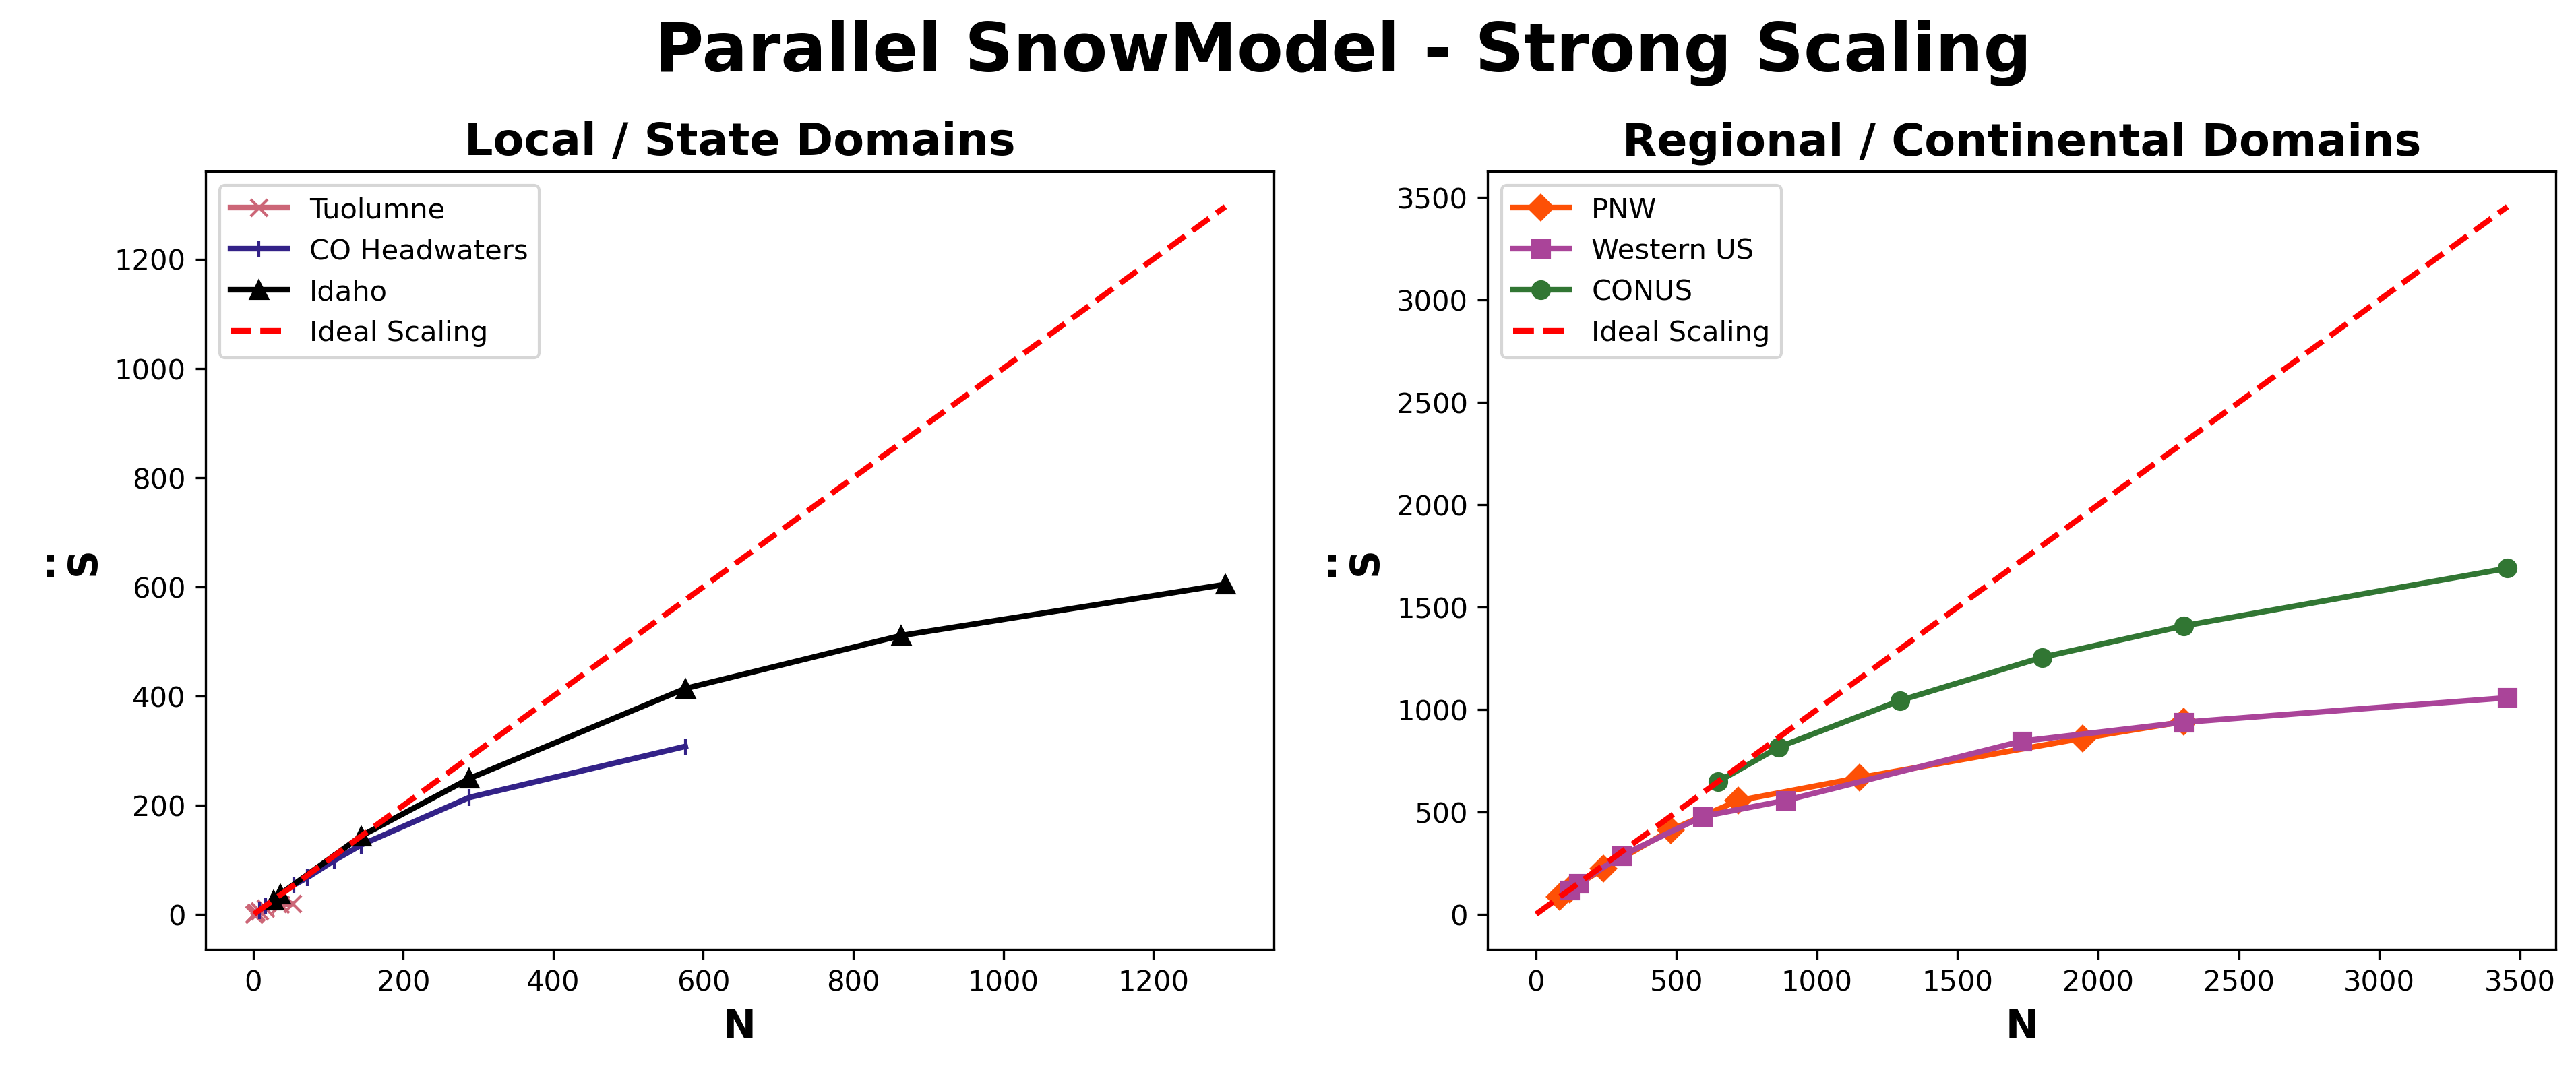

In [22]:
fig,ax = plt.subplots(1,2,figsize = (15,5),dpi = 300)
## local and state domains
x_embar = [1,1296]
y_embar = [1,1296]
ax[0].plot(df_tu.num_proc,df_tu.approx_speedup,label = 'Tuolumne',marker = 'x',color = '#CC6677',linewidth = 2)
ax[0].plot(df_co.num_proc,df_co.approx_speedup,label = 'CO Headwaters',marker = '|',color = '#332288',linewidth = 2)
ax[0].plot(df_id.num_proc,df_id.approx_speedup,label = 'Idaho',marker = '^',color = 'black',linewidth = 2)
ax[0].plot(x_embar,y_embar,color = 'red',linestyle = 'dashed',label = 'Ideal Scaling',linewidth = 2)
ax[0].set_xlabel('N',fontweight = 'bold',fontsize = 14)
ax[0].set_ylabel('..\nS',fontweight = 'bold',fontsize = 14)
ax[0].legend()
ax[0].set_title('Local / State Domains',fontweight = 'bold',fontsize = 16)

## regional and continental domains
x_embar = [1,3456]
y_embar = [1,3456]
ax[1].plot(df_pnw.num_proc,df_pnw.approx_speedup,label = 'PNW',marker = 'D',color = '#FD5006',linewidth = 2)
ax[1].plot(df_west.num_proc,df_west.approx_speedup,label = 'Western US',marker = 's',color = '#AA4499',linewidth = 2)
ax[1].plot(df_conus.num_proc,df_conus.approx_speedup,label = 'CONUS',marker = 'o',color ='#317633',linewidth = 2)
ax[1].plot(x_embar,y_embar,color = 'red',linestyle = 'dashed',label = 'Ideal Scaling',linewidth = 2)
# ax[1].set_xlabel('Number of Processes',fontweight = 'bold',fontsize = 14)
ax[1].set_xlabel('N',fontweight = 'bold',fontsize = 14)
ax[1].set_ylabel('..\nS',fontweight = 'bold',fontsize = 14)
ax[1].set_title('Regional / Continental Domains',fontweight = 'bold',fontsize = 16)
ax[1].legend()
plt.suptitle('Parallel SnowModel - Strong Scaling', y = 1.03,fontweight = 'bold',fontsize = 24)
plt.savefig('speedup.png',dpi=300,bbox_inches = "tight")